In [23]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
from itertools import permutations
import matplotlib.patches as mpatches
import pickle
import loggerOutput
color_list =["#3eb991","#6ecadc","#e9a820","#e01563","#edb196","#1f94ac","#ae9a6a","#ccb8a6","#343a44"]

ModuleNotFoundError: No module named 'loggerOutput'

# Import stuff from the file 

In [ ]:
def read_pickle(file_name):
    data = None
    with open("output_coord/"+file_name+".pickle", 'rb')as f:
    
        data = pickle.load(f)
    f.close()
    return data

In [ ]:
datas =[]
if loggerOutput.comb_formation:
    datas .append( read_pickle("comb_formation"))
if loggerOutput.movable_location:
    datas .append( read_pickle("movable_location"))
if loggerOutput.periphery:
    datas .append( read_pickle("periphery"))
if loggerOutput.extend:
    datas .append( read_pickle("extend"))
if loggerOutput.retract:
    datas .append( read_pickle("retract"))
    

# Graph the imports

In [ ]:
def graph(datas,):
    fig, ax = plt.subplots()
    i = 0
    
    for data in datas:
        x, y = zip(*data)
        ax.scatter(x,y,color = color_list[i])
        i +=1


    ax.set_xticks(np.arange(0, 100, 5))
    ax.set_yticks(np.arange(0, 100, 5))

# Comb function

In [ ]:
def give_comb_formation(cell_num: int,upper_right: (int,int),teeth_length: int,teeth_gap:int)-> list[(int,int)]:
        ## (x,y),(x+1,y)
        print("number of cells we have",cell_num)
        teeth_gap +=1
        cell_num -=1
        cur_point_x = upper_right[0]
        cur_point_y = upper_right[1]
        formation = []
        length_left = teeth_length
        formation.append([cur_point_x,cur_point_y])
        gap = False
        gap_left = teeth_gap
        to_right = True
        while True:
            if not(cell_num>0):
                break
            if  gap == False:
                #add one to the y axis , extending the teeth
                if length_left >0:
                    
                    cur_point_x -=1 
                    cur_point_x %= 100
                    formation.append((cur_point_x,cur_point_y))
                    length_left-=1
                    cell_num-=1
                
                else:
                    #go down one extending the length of the comb
               
                    gap = True
                    cur_point_x += teeth_length # restore the x-axis
                    cur_point_x %=100
                    length_left = teeth_length
            else:
                if gap_left > 0  : 
                    if  to_right == False:
                       
                        cur_point_y -=1
                        cur_point_x +=1 # move the coordinate back 
                        cur_point_x %= 100
                        cur_point_y %= 100
                        formation.append((cur_point_x,cur_point_y))
                        gap_left-=1
                        cell_num-=1
                        to_right = True
                    else:
                    
                        cur_point_x -=1 # move the coordinate back 
                        cur_point_x %= 100
                        if (cur_point_x,cur_point_y) not in  formation:
                            formation.append((cur_point_x,cur_point_y))
                            cell_num-=1
                            to_right = False
                         
                else:
                    to_right = True
                    gap = False
                    gap_left = teeth_gap
        formation_set = list(set(map(tuple,formation)))
        print("size of future comb",len(formation_set))
        formation_check = formation
        while formation_check != []:
            p = formation_check.pop()
            if p in formation_check:
                print(p)

        return formation



In [ ]:
upper_right = (56, 99)
teeth_length=2
teeth_gap=2
cell_num = 235
comb_formation = give_comb_formation(cell_num,upper_right,teeth_length,teeth_gap)

number of cells we have 235
size of future comb 206
(55, 15)
(55, 18)
(55, 21)
(55, 24)
(55, 27)
(55, 30)
(55, 33)
(55, 36)
(55, 39)
(55, 42)
(55, 45)
(55, 48)
(55, 51)
(55, 54)
(55, 57)
(55, 60)
(55, 63)
(55, 66)
(55, 69)
(55, 72)
(55, 75)
(55, 78)
(55, 81)
(55, 84)
(55, 87)
(55, 90)
(55, 93)
(55, 96)
(55, 99)


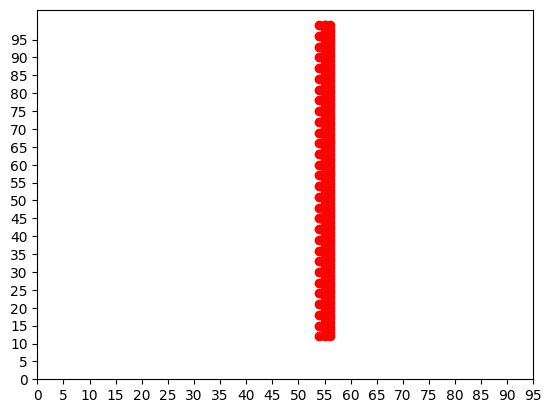

In [ ]:
fig, ax = plt.subplots()
#x, y = np.meshgrid(list(range(10)), list(range(10)))
x, y = zip(*comb_formation)
ax.scatter(x,y,color = "r")


ax.set_xticks(np.arange(0, 100, 5))
ax.set_yticks(np.arange(0, 100, 5))

# find upper left corner

In [ ]:
def find_upper_right(formation:list[(int,int)])-> (int,int):
        #going to find the pivot first, then find the upper right corner
        xs, ys = zip(*formation)
        x_coord = max(xs)
        y_coord = max(ys)
        if (x_coord,y_coord) in formation:
            return (x_coord,y_coord)
        else:
            possible_points = []
            for y in ys:
                if (x_coord,y) in formation:
                    possible_points.append((x_coord,y))
            x_can, y_can = zip(*possible_points)
            y_coord = max(y_can)
            return (x_coord,y_coord)


# How to move from one formation to the next

In [ ]:
def move_formation(num_movable_cell,movable_cell:list[(int,int)],movable_location:list[(int,int)],final_formation:list[(int,int)]):
    movable_cell_set =  {tuple(x) for x in movable_cell} 
    final_formation_set ={tuple(x) for x in final_formation} 
    movable_location_set = {tuple(x) for x in movable_location} 

    cells_not_on_spot = movable_cell_set & movable_cell_set.symmetric_difference(final_formation_set)
    cells_not_on_spot = list(cells_not_on_spot)
    cells_not_on_spot.sort()
    print("symmetrix_difference=",final_formation_set & movable_cell_set.symmetric_difference(final_formation_set) )
    destination = (final_formation_set & movable_cell_set.symmetric_difference(final_formation_set)) & movable_location_set
    print("this is the destination",destination)
    destination = list(destination)
    destination.sort()
    retrac=[]
    extend = []
    for i in range(min(num_movable_cell,len(cells_not_on_spot),len(destination))):
        retrac.append(cells_not_on_spot[i])
        extend.append(destination[i])
    return retrac,extend

In [ ]:
movable_location= [(55, 14), (55, 16), (54, 15), (55, 17), (55, 19), (54, 18), (55, 20), (55, 22), (54, 21), (55, 23), (55, 25), (54, 24), (55, 26), (55, 28), (54, 27), (55, 29), (55, 31), (54, 30), (55, 32), (55, 34), (54, 33), (55, 35), (55, 37), (54, 36), (55, 38), (55, 40), (54, 39), (55, 41), (55, 43), (54, 42), (55, 44), (55, 46), (54, 45), (55, 47), (55, 49), (54, 48), (55, 50), (55, 52), (54, 51), (55, 53), (54, 54), (54, 55), (54, 56), (55, 58), (54, 57), (55, 59), (55, 61), (54, 60), (55, 62), (55, 64), (54, 63), (55, 65), (55, 67), (54, 66), (55, 68), (55, 70), (54, 69), (55, 71), (55, 73), (54, 72), (55, 74), (55, 76), (54, 75), (55, 80), (55, 82), (54, 81), (55, 83), (55, 85), (54, 84), (55, 86), (55, 88), (54, 87), (55, 89), (55, 91), (54, 90), (55, 92), (55, 94), (54, 93), (55, 95), (55, 97), (54, 96), (55, 98), (55, 0), (54, 99), (55, 1), (55, 2), (55, 3), (55, 4), (55, 5), (55, 6), (55, 7), (55, 8), (55, 9), (55, 10), (55, 11), (55, 12), (55, 13), (55, 77), (55, 78), (55, 79), (58, 0), (58, 1), (58, 2), (58, 3), (58, 4), (58, 5), (58, 6), (58, 7), (58, 8), (58, 9), (58, 10), (58, 11), (58, 12), (58, 13), (58, 14), (58, 15), (58, 16), (58, 17), (58, 18), (58, 19), (58, 20), (58, 21), (58, 22), (58, 23), (58, 24), (58, 25), (58, 26), (58, 27), (58, 28), (58, 29), (58, 30), (58, 31), (58, 32), (58, 33), (58, 34), (58, 35), (58, 36), (58, 37), (58, 38), (58, 39), (58, 40), (58, 41), (58, 42), (58, 43), (58, 44), (58, 45), (58, 46), (58, 47), (58, 48), (58, 49), (58, 50), (58, 51), (58, 52), (58, 53), (58, 54), (58, 55), (58, 56), (58, 57), (58, 58), (58, 59), (58, 60), (58, 61), (58, 62), (58, 63), (58, 64), (58, 65), (58, 66), (58, 67), (58, 68), (58, 69), (58, 70), (58, 71), (58, 72), (58, 73), (58, 74), (58, 75), (58, 77), (58, 78), (58, 79), (58, 80), (58, 81), (58, 82), (58, 83), (58, 84), (58, 85), (58, 86), (58, 87), (58, 88), (58, 89), (58, 90), (58, 91), (58, 92), (58, 93), (58, 94), (58, 95), (58, 96), (58, 97), (58, 98), (58, 99), (59, 76)]
periphery= [(55, 57), (57, 91), (56, 1), (55, 66), (56, 10), (55, 75), (56, 74), (56, 19), (55, 84), (56, 83), (57, 48), (56, 28), (55, 93), (56, 92), (57, 57), (56, 37), (57, 2), (57, 66), (57, 11), (57, 75), (57, 20), (57, 84), (56, 3), (56, 67), (56, 12), (56, 76), (57, 41), (56, 85), (57, 50), (56, 94), (57, 59), (57, 4), (57, 68), (57, 13), (57, 77), (56, 5), (55, 15), (57, 34), (56, 14), (57, 98), (56, 78), (57, 43), (56, 23), (57, 52), (56, 32), (57, 61), (57, 6), (55, 36), (57, 70), (55, 45), (55, 54), (56, 53), (55, 63), (56, 62), (56, 7), (55, 72), (56, 71), (57, 36), (56, 16), (56, 80), (57, 45), (56, 25), (56, 89), (57, 54), (57, 63), (57, 72), (56, 46), (55, 56), (56, 0), (56, 64), (57, 29), (56, 9), (57, 93), (56, 73), (57, 38), (56, 82), (57, 47), (58, 76), (57, 56), (57, 1), (57, 65), (57, 22), (56, 2), (57, 86), (57, 31), (56, 11), (57, 95), (57, 40), (56, 20), (57, 49), (55, 24), (57, 58), (55, 33), (55, 42), (56, 41), (55, 51), (56, 50), (57, 15), (55, 60), (57, 79), (56, 59), (57, 24), (56, 4), (57, 88), (56, 68), (57, 33), (56, 13), (57, 97), (56, 77), (57, 42), (57, 51), (55, 81), (55, 90), (56, 34), (55, 99), (56, 98), (56, 43), (57, 8), (56, 52), (57, 17), (57, 81), (56, 61), (57, 26), (56, 6), (57, 90), (56, 70), (57, 35), (57, 99), (57, 44), (56, 91), (57, 10), (57, 74), (57, 19), (57, 83), (57, 28), (57, 92), (57, 37), (57, 46), (55, 21), (55, 30), (56, 29), (55, 39), (56, 38), (57, 3), (55, 48), (57, 67), (56, 47), (57, 12), (57, 21), (57, 85), (56, 65), (57, 30), (57, 94), (57, 39), (55, 69), (56, 22), (55, 87), (56, 86), (56, 31), (55, 96), (56, 95), (57, 60), (56, 40), (57, 5), (57, 69), (56, 49), (57, 14), (57, 78), (56, 58), (57, 23), (57, 87), (57, 32), (57, 96), (56, 79), (56, 88), (57, 53), (56, 97), (57, 62), (57, 7), (57, 71), (57, 16), (57, 80), (57, 25), (55, 55), (57, 89), (56, 8), (55, 18), (56, 17), (55, 27), (56, 26), (57, 55), (56, 35), (57, 0), (57, 64), (56, 44), (57, 9), (57, 73), (57, 18), (57, 82), (57, 27)]
retract= [(55, 15), (55, 18), (55, 21), (55, 24), (55, 27), (55, 30), (55, 33), (55, 36), (55, 39), (55, 42), (55, 45), (55, 48), (55, 51), (55, 54), (55, 55), (55, 56), (55, 57), (55, 60), (55, 63), (55, 66), (55, 69), (55, 72), (55, 75), (55, 81), (55, 84), (55, 87), (55, 90), (55, 93), (55, 96), (55, 99), (56, 0), (56, 2), (56, 3), (56, 5), (56, 6), (56, 8), (56, 9), (56, 11), (56, 12), (56, 14), (56, 17), (56, 20), (56, 23), (56, 26), (56, 29), (56, 32), (56, 35), (56, 38), (56, 41), (56, 44), (56, 47), (56, 50), (56, 53), (56, 59), (56, 62), (56, 65), (56, 68), (56, 71), (56, 74), (56, 77), (56, 78), (56, 79), (56, 80), (56, 82), (56, 83), (56, 85), (56, 86), (56, 88), (56, 89), (56, 91), (56, 94), (56, 97), (57, 77), (57, 78), (57, 79), (57, 80), (57, 81), (57, 82), (57, 83), (57, 84), (57, 85), (57, 86), (57, 87), (57, 88), (57, 89), (57, 90)]
extend= [(58, 0), (58, 1), (58, 2), (58, 3), (58, 4), (58, 5), (58, 6), (58, 7), (58, 8), (58, 9), (58, 10), (58, 11), (58, 12), (58, 13), (58, 14), (58, 15), (58, 16), (58, 17), (58, 18), (58, 19), (58, 20), (58, 21), (58, 22), (58, 23), (58, 24), (58, 25), (58, 26), (58, 27), (58, 28), (58, 29), (58, 30), (58, 31), (58, 32), (58, 33), (58, 34), (58, 35), (58, 36), (58, 37), (58, 38), (58, 39), (58, 40), (58, 41), (58, 42), (58, 43), (58, 44), (58, 45), (58, 46), (58, 47), (58, 48), (58, 49), (58, 50), (58, 51), (58, 52), (58, 53), (58, 54), (58, 55), (58, 56), (58, 57), (58, 58), (58, 59), (58, 60), (58, 61), (58, 62), (58, 63), (58, 64), (58, 65), (58, 66), (58, 67), (58, 68), (58, 69), (58, 70), (58, 71), (58, 72), (58, 73), (58, 74), (58, 75), (58, 90), (58, 91), (58, 92), (58, 93), (58, 94), (58, 95), (58, 96), (58, 97), (58, 98), (58, 99)]
print(len(periphery))
upper_right = find_upper_right(periphery)
print(upper_right)
movable_location = [(45, 43), (44, 44), (44, 45), (44, 46), (44, 47), (44, 48), (44, 49), (44, 50), (44, 51), (44, 52), (44, 53), (44, 54), (44, 55), (44, 56), (45, 58), (44, 57), (46, 42), (46, 58), (47, 42), (47, 58), (48, 42), (48, 58), (49, 42), (49, 58), (50, 42), (50, 58), (51, 42), (51, 58), (52, 42), (52, 58), (53, 42), (53, 58), (54, 42), (54, 58), (55, 29), (55, 31), (54, 30), (55, 32), (55, 34), (54, 33), (55, 35), (55, 37), (54, 36), (55, 38), (55, 40), (54, 39), (55, 41), (55, 58), (56, 29), (56, 58), (57, 29), (58, 30), (58, 31), (58, 32), (58, 33), (58, 34), (58, 35), (58, 36), (58, 37), (58, 38), (58, 39), (58, 40), (58, 41), (58, 42), (58, 43), (58, 44), (58, 45), (58, 46), (58, 47), (58, 48), (58, 49), (58, 50), (58, 51), (58, 52), (58, 53), (58, 54), (58, 55), (58, 56), (57, 58), (58, 57)]
teeth_length = 2
teeth_gap = 2
comb_formation = give_comb_formation(len(periphery),upper_right,teeth_length,teeth_gap)
print(len(comb_formation))
move_formation(len(periphery),periphery,movable_location,comb_formation)

200
(58, 76)
number of cells we have 200
size of future comb 175
200
symmetrix_difference= {(58, 50), (58, 56), (58, 59), (58, 65), (58, 4), (58, 62), (58, 68), (58, 7), (58, 13), (58, 71), (58, 10), (58, 16), (58, 74), (58, 19), (58, 25), (58, 22), (58, 28), (58, 34), (58, 31), (58, 37), (58, 40), (58, 46), (58, 43), (58, 49), (56, 55), (58, 52), (58, 58), (58, 55), (58, 61), (58, 6), (58, 64), (58, 3), (58, 9), (58, 70), (58, 67), (58, 73), (58, 12), (58, 18), (58, 15), (58, 21), (58, 27), (58, 24), (58, 30), (58, 33), (58, 39), (58, 36), (58, 42), (58, 45), (58, 51), (58, 48), (58, 54), (58, 57), (58, 63), (58, 2), (58, 8), (58, 60), (58, 66), (58, 5), (58, 11), (58, 72), (58, 69), (58, 75), (58, 14), (58, 20), (58, 17), (58, 23), (58, 26), (58, 32), (58, 29), (58, 35), (58, 38), (58, 44), (57, 76), (58, 41), (58, 47), (58, 53)}
this is the destination {(58, 50), (58, 56), (58, 34), (58, 31), (58, 37), (58, 40), (58, 46), (58, 43), (58, 49), (58, 52), (58, 55), (58, 30), (58, 33), (

([(55, 15),
  (55, 18),
  (55, 21),
  (55, 24),
  (55, 27),
  (55, 30),
  (55, 33),
  (55, 36),
  (55, 39),
  (55, 42),
  (55, 45),
  (55, 48),
  (55, 51),
  (55, 54),
  (55, 55),
  (55, 56),
  (55, 57),
  (55, 60),
  (55, 63),
  (55, 66),
  (55, 69),
  (55, 72),
  (55, 75),
  (55, 81),
  (55, 84),
  (55, 87),
  (55, 90),
  (55, 93)],
 [(58, 30),
  (58, 31),
  (58, 32),
  (58, 33),
  (58, 34),
  (58, 35),
  (58, 36),
  (58, 37),
  (58, 38),
  (58, 39),
  (58, 40),
  (58, 41),
  (58, 42),
  (58, 43),
  (58, 44),
  (58, 45),
  (58, 46),
  (58, 47),
  (58, 48),
  (58, 49),
  (58, 50),
  (58, 51),
  (58, 52),
  (58, 53),
  (58, 54),
  (58, 55),
  (58, 56),
  (58, 57)])

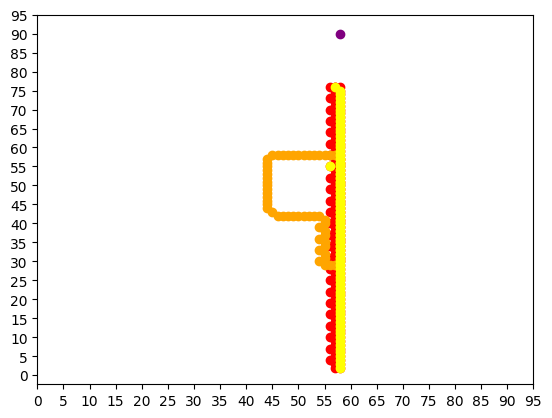

In [ ]:
fig, ax = plt.subplots()
#x, y = np.meshgrid(list(range(10)), list(range(10)))
symmetrix_difference= {(58, 50), (58, 56), (58, 59), (58, 65), (58, 4), (58, 62), (58, 68), (58, 7), (58, 13), (58, 71), (58, 10), (58, 16), (58, 74), (58, 19), (58, 25), (58, 22), (58, 28), (58, 34), (58, 31), (58, 37), (58, 40), (58, 46), (58, 43), (58, 49), (56, 55), (58, 52), (58, 58), (58, 55), (58, 61), (58, 6), (58, 64), (58, 3), (58, 9), (58, 70), (58, 67), (58, 73), (58, 12), (58, 18), (58, 15), (58, 21), (58, 27), (58, 24), (58, 30), (58, 33), (58, 39), (58, 36), (58, 42), (58, 45), (58, 51), (58, 48), (58, 54), (58, 57), (58, 63), (58, 2), (58, 8), (58, 60), (58, 66), (58, 5), (58, 11), (58, 72), (58, 69), (58, 75), (58, 14), (58, 20), (58, 17), (58, 23), (58, 26), (58, 32), (58, 29), (58, 35), (58, 38), (58, 44), (57, 76), (58, 41), (58, 47), (58, 53)}
x, y = zip(*comb_formation)
ax.scatter(x,y,color = "r")
x, y = zip(*movable_location)
ax.scatter(x,y,color = "orange")
x, y = zip(*symmetrix_difference)
ax.scatter(x,y,color = "yellow")
ax.scatter( 58, 90,color ="purple")

ax.set_xticks(np.arange(0, 100, 5))
ax.set_yticks(np.arange(0, 100, 5))

# find pivot 

In [ ]:
def getPivotElement(array, left, right):
    if right < left:
        return -1
    if right == left:
        return left
    middle = None
    if (left + right) %2 ==0:
        middle = left + right//2
    else:
        middle = left + right//2 -1
    print(middle)
    if (middle < right) and (array[middle] > array[middle + 1]):
        return middle
    if (middle > left )and (array[middle] < array[middle - 1]):
        return middle-1
    if array[left] >= array[middle]:
        return getPivotElement(array, left, middle-1)
    else:
        return getPivotElement(array, middle + 1, right)

In [ ]:
l = [16, 18, 22, 25, 1, 3, 5, 6, 7, 10, 14]
getPivotElement(l,0,len(l)-1) +1

5
2
4


4

# Teeth 1 gap 4

In [ ]:
info = 0
info ==False

True

FileNotFoundError: [Errno 2] No such file or directory: 'graphs/Teeth Length 1, Gap 4.png'

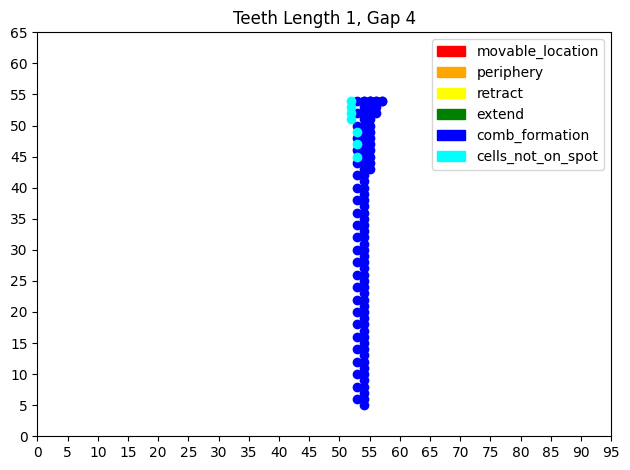

In [ ]:
cells_not_on_spot=[(52, 51), (52, 52), (52, 53), (52, 54), (53, 45), (53, 47), (53, 49)]
comb_formation= comb_formation= [(54, 54), (53, 54), (54, 53), (54, 52), (53, 52), (54, 51), (54, 50), (53, 50), (54, 49), (54, 48), (53, 48), (54, 47), (54, 46), (53, 46), (54, 45), (54, 44), (53, 44), (54, 43), (54, 42), (53, 42), (54, 41), (54, 40), (53, 40), (54, 39), (54, 38), (53, 38), (54, 37), (54, 36), (53, 36), (54, 35), (54, 34), (53, 34), (54, 33), (54, 32), (53, 32), (54, 31), (54, 30), (53, 30), (54, 29), (54, 28), (53, 28), (54, 27), (54, 26), (53, 26), (54, 25), (54, 24), (53, 24), (54, 23), (54, 22), (53, 22), (54, 21), (54, 20), (53, 20), (54, 19), (54, 18), (53, 18), (54, 17), (54, 16), (53, 16), (54, 15), (54, 14), (53, 14), (54, 13), (54, 12), (53, 12), (54, 11), (54, 10), (53, 10), (54, 9), (54, 8), (53, 8), (54, 7), (54, 6), (53, 6), (54, 5), (55, 54), (55, 54), (54, 54), (55, 53), (55, 52), (54, 52), (55, 51), (55, 50), (54, 50), (55, 49), (55, 48), (54, 48), (55, 47), (55, 46), (54, 46), (55, 45), (55, 44), (54, 44), (55, 43), (56, 54), (56, 54), (55, 54), (56, 53), (56, 52), (57, 54), (57, 54)]
"""movable_location= [(56, 11), (56, 13), (55, 12), (56, 14), (56, 16), (55, 15), (56, 17), (56, 19), (55, 18), (56, 20), (56, 22), (55, 21), (56, 23), (56, 25), (55, 24), (56, 26), (56, 28), (55, 27), (56, 29), (56, 31), (55, 30), (56, 32), (56, 34), (55, 33), (56, 35), (56, 37), (55, 36), (56, 38), (56, 40), (55, 39), (56, 41), (56, 43), (55, 42), (56, 44), (56, 46), (55, 45), (56, 47), (56, 49), (55, 48), (56, 50), (56, 52), (55, 51), (56, 53), (56, 55), (55, 54), (55, 56), (55, 57), (55, 58), (55, 59), (55, 60), (55, 61), (55, 62), (55, 63), (55, 64), (55, 65), (55, 66), (55, 67), (55, 68), (55, 69), (55, 70), (55, 71), (55, 72), (55, 73), (55, 74), (55, 75), (55, 76), (55, 77), (55, 78), (55, 79), (55, 80), (55, 81), (55, 82), (55, 83), (55, 84), (55, 85), (55, 86), (55, 87), (55, 88), (55, 89), (55, 90), (55, 91), (55, 92), (55, 93), (55, 94), (55, 95), (55, 96), (55, 97), (55, 98), (56, 0), (55, 99), (57, 1), (58, 0), (57, 11), (58, 11), (59, 12), (59, 13), (59, 14), (59, 15), (59, 16), (59, 17), (59, 18), (59, 19), (59, 20), (59, 21), (59, 22), (59, 23), (59, 24), (59, 25), (59, 26), (59, 27), (59, 28), (59, 29), (59, 30), (59, 31), (59, 32), (59, 33), (59, 34), (59, 35), (59, 36), (59, 37), (59, 38), (59, 39), (59, 40), (59, 41), (59, 42), (59, 43), (59, 44), (59, 45), (59, 46), (59, 47), (59, 48), (59, 49), (59, 50), (59, 51), (59, 52), (59, 53), (59, 54), (59, 55), (59, 56), (59, 57), (59, 58), (59, 59), (59, 60), (59, 61), (59, 62), (59, 63), (59, 64), (59, 65), (59, 66), (59, 67), (59, 68), (59, 69), (59, 70), (59, 71), (59, 72), (59, 73), (59, 74), (59, 75), (59, 76), (59, 77), (59, 78), (59, 79), (59, 80), (59, 81), (59, 82), (59, 83), (59, 84), (59, 85), (59, 86), (59, 87), (59, 88), (59, 89), (59, 90), (59, 91), (59, 92), (59, 93), (59, 94), (59, 95), (59, 96), (59, 97), (59, 98), (59, 99)]
periphery= [(58, 56), (58, 65), (56, 74), (56, 83), (56, 92), (58, 22), (58, 86), (58, 31), (58, 95), (58, 40), (57, 20), (58, 49), (58, 58), (56, 67), (56, 12), (56, 76), (57, 41), (56, 21), (56, 85), (57, 50), (56, 30), (58, 15), (56, 94), (56, 39), (58, 24), (58, 88), (58, 33), (57, 13), (58, 97), (58, 42), (58, 51), (56, 60), (56, 69), (57, 34), (56, 78), (57, 43), (56, 87), (57, 52), (58, 17), (56, 96), (58, 81), (58, 26), (58, 90), (58, 35), (58, 99), (58, 44), (58, 53), (56, 62), (56, 71), (56, 80), (56, 89), (58, 74), (58, 19), (58, 83), (58, 28), (58, 92), (58, 37), (58, 46), (56, 64), (57, 29), (56, 73), (57, 38), (56, 18), (56, 82), (57, 47), (58, 12), (58, 67), (58, 76), (58, 21), (58, 85), (58, 30), (58, 94), (58, 39), (56, 48), (56, 57), (57, 22), (56, 66), (57, 31), (56, 75), (57, 40), (58, 60), (56, 84), (57, 49), (58, 14), (58, 69), (58, 78), (58, 23), (58, 87), (58, 32), (58, 96), (56, 59), (56, 68), (56, 77), (58, 62), (58, 71), (58, 16), (58, 80), (58, 25), (58, 89), (58, 34), (58, 98), (56, 98), (57, 17), (56, 61), (57, 26), (56, 70), (57, 35), (58, 55), (58, 64), (57, 44), (58, 73), (58, 18), (58, 82), (58, 27), (56, 27), (58, 91), (56, 91), (56, 36), (56, 45), (56, 54), (57, 19), (56, 63), (57, 28), (58, 48), (58, 57), (57, 37), (58, 66), (57, 46), (58, 75), (58, 20), (58, 84), (56, 93), (57, 12), (56, 56), (58, 41), (56, 65), (58, 50), (58, 59), (58, 68), (58, 13), (58, 77), (56, 86), (56, 95), (57, 14), (56, 58), (57, 23), (58, 43), (58, 52), (57, 32), (58, 61), (58, 70), (56, 15), (58, 79), (56, 79), (56, 24), (56, 88), (57, 53), (56, 33), (56, 97), (56, 42), (56, 51), (57, 16), (58, 36), (58, 45), (57, 25), (58, 54), (58, 63), (58, 72), (56, 72), (56, 81), (56, 90), (57, 55), (57, 0), (56, 99), (58, 29), (58, 93), (58, 38), (58, 47)]
retract= []"""
fig, ax = plt.subplots()
#x, y = np.meshgrid(list(range(10)), list(range(10)))

""" x, y = zip(*movable_location)
ax.scatter(x,y,color = "red")
x, y = zip(*periphery)
ax.scatter(x,y,color = "orange")
x, y = zip(*retract)
ax.scatter(x,y,color = "yellow")
x, y = zip(*extend)
ax.scatter(x,y,color = "green") """
x, y = zip(*comb_formation)
ax.scatter(x,y,color = "blue")
x, y = zip(*cells_not_on_spot)
ax.scatter(x,y,color = "cyan")
"""ax.scatter(57, 99,color = "purple")
ax.scatter(58, 76,color = "pink")"""

color_list = ["red","orange","yellow","green","blue","cyan"]
lables = ["movable_location","periphery","retract","extend","comb_formation","cells_not_on_spot"]
colorlist = zip(lables,color_list)
handles = [mpatches.Patch(color=colour, label=label) for label, colour in colorlist]
ax.set_xticks(np.arange(0, 100, 5))
ax.set_yticks(np.arange(0, 70, 5))
name = "Teeth Length 1, Gap 4"
ax.set_title(name)
a = plt.legend(handles, lables, ncol=1, bbox_to_anchor=(1, 1))
plt.tight_layout()
fig.savefig(f'graphs/{name}.png')


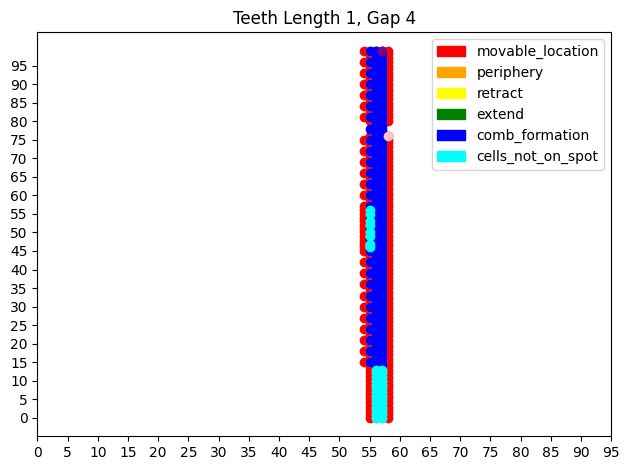

In [ ]:
cells_not_on_spot=[(55, 46), (55, 47), (55, 49), (55, 50), (55, 52), (55, 53), (55, 55), (55, 56), (56, 0), (56, 1), (56, 2), (56, 3), (56, 4), (56, 5), (56, 6), (56, 7), (56, 8), (56, 9), (56, 10), (56, 11), (56, 12), (56, 13), (57, 0), (57, 1), (57, 2), (57, 3), (57, 4), (57, 5), (57, 6), (57, 7), (57, 8), (57, 9), (57, 10), (57, 11), (57, 12), (57, 13)]
wanting_to_move={(56, 77), (55, 78), (56, 49), (57, 79), (56, 46), (56, 52), (57, 78), (56, 55), (56, 18), (56, 15), (56, 21), (56, 79), (56, 24), (56, 30), (56, 27), (56, 33), (56, 39), (56, 36), (56, 42), (56, 45), (57, 77), (56, 51), (56, 48), (56, 54), (56, 57), (56, 63), (56, 60), (56, 66), (56, 69), (56, 75), (56, 72), (56, 78), (56, 84), (56, 81), (56, 87), (56, 90), (56, 96), (56, 93), (56, 99), (56, 47), (56, 50), (56, 56), (56, 53)}
comb_formation= [[57, 99], [56, 99], [55, 99], [56, 99], [57, 98], [56, 98], [57, 97], [56, 97], [57, 96], [56, 96], [55, 96], [56, 96], [57, 95], [56, 95], [57, 94], [56, 94], [57, 93], [56, 93], [55, 93], [56, 93], [57, 92], [56, 92], [57, 91], [56, 91], [57, 90], [56, 90], [55, 90], [56, 90], [57, 89], [56, 89], [57, 88], [56, 88], [57, 87], [56, 87], [55, 87], [56, 87], [57, 86], [56, 86], [57, 85], [56, 85], [57, 84], [56, 84], [55, 84], [56, 84], [57, 83], [56, 83], [57, 82], [56, 82], [57, 81], [56, 81], [55, 81], [56, 81], [57, 80], [56, 80], [57, 79], [56, 79], [57, 78], [56, 78], [55, 78], [56, 78], [57, 77], [56, 77], [57, 76], [56, 76], [57, 75], [56, 75], [55, 75], [56, 75], [57, 74], [56, 74], [57, 73], [56, 73], [57, 72], [56, 72], [55, 72], [56, 72], [57, 71], [56, 71], [57, 70], [56, 70], [57, 69], [56, 69], [55, 69], [56, 69], [57, 68], [56, 68], [57, 67], [56, 67], [57, 66], [56, 66], [55, 66], [56, 66], [57, 65], [56, 65], [57, 64], [56, 64], [57, 63], [56, 63], [55, 63], [56, 63], [57, 62], [56, 62], [57, 61], [56, 61], [57, 60], [56, 60], [55, 60], [56, 60], [57, 59], [56, 59], [57, 58], [56, 58], [57, 57], [56, 57], [55, 57], [56, 57], [57, 56], [56, 56], [57, 55], [56, 55], [57, 54], [56, 54], [55, 54], [56, 54], [57, 53], [56, 53], [57, 52], [56, 52], [57, 51], [56, 51], [55, 51], [56, 51], [57, 50], [56, 50], [57, 49], [56, 49], [57, 48], [56, 48], [55, 48], [56, 48], [57, 47], [56, 47], [57, 46], [56, 46], [57, 45], [56, 45], [55, 45], [56, 45], [57, 44], [56, 44], [57, 43], [56, 43], [57, 42], [56, 42], [55, 42], [56, 42], [57, 41], [56, 41], [57, 40], [56, 40], [57, 39], [56, 39], [55, 39], [56, 39], [57, 38], [56, 38], [57, 37], [56, 37], [57, 36], [56, 36], [55, 36], [56, 36], [57, 35], [56, 35], [57, 34], [56, 34], [57, 33], [56, 33], [55, 33], [56, 33], [57, 32], [56, 32], [57, 31], [56, 31], [57, 30], [56, 30], [55, 30], [56, 30], [57, 29], [56, 29], [57, 28], [56, 28], [57, 27], [56, 27], [55, 27], [56, 27], [57, 26], [56, 26], [57, 25], [56, 25], [57, 24], [56, 24], [55, 24], [56, 24], [57, 23], [56, 23], [57, 22], [56, 22], [57, 21], [56, 21], [55, 21], [56, 21], [57, 20], [56, 20], [57, 19], [56, 19], [57, 18], [56, 18], [55, 18], [56, 18], [57, 17], [56, 17], [57, 16], [56, 16], [57, 15], [56, 15], [55, 15], [56, 15], [57, 14], [56, 14]]
movable_location= [(55, 14), (55, 16), (54, 15), (55, 17), (55, 19), (54, 18), (55, 20), (55, 22), (54, 21), (55, 23), (55, 25), (54, 24), (55, 26), (55, 28), (54, 27), (55, 29), (55, 31), (54, 30), (55, 32), (55, 34), (54, 33), (55, 35), (55, 37), (54, 36), (55, 38), (55, 40), (54, 39), (55, 41), (55, 43), (54, 42), (55, 44), (54, 45), (54, 46), (54, 47), (54, 48), (54, 49), (54, 50), (54, 51), (54, 52), (54, 53), (54, 54), (54, 55), (54, 56), (55, 58), (54, 57), (55, 59), (55, 61), (54, 60), (55, 62), (55, 64), (54, 63), (55, 65), (55, 67), (54, 66), (55, 68), (55, 70), (54, 69), (55, 71), (55, 73), (54, 72), (55, 74), (55, 76), (54, 75), (55, 80), (55, 82), (54, 81), (55, 83), (55, 85), (54, 84), (55, 86), (55, 88), (54, 87), (55, 89), (55, 91), (54, 90), (55, 92), (55, 94), (54, 93), (55, 95), (55, 97), (54, 96), (55, 98), (55, 0), (54, 99), (55, 1), (55, 2), (55, 3), (55, 4), (55, 5), (55, 6), (55, 7), (55, 8), (55, 9), (55, 10), (55, 11), (55, 12), (55, 13), (56, 77), (56, 79), (58, 0), (58, 1), (58, 2), (58, 3), (58, 4), (58, 5), (58, 6), (58, 7), (58, 8), (58, 9), (58, 10), (58, 11), (58, 12), (58, 13), (58, 14), (58, 15), (58, 16), (58, 17), (58, 18), (58, 19), (58, 20), (58, 21), (58, 22), (58, 23), (58, 24), (58, 25), (58, 26), (58, 27), (58, 28), (58, 29), (58, 30), (58, 31), (58, 32), (58, 33), (58, 34), (58, 35), (58, 36), (58, 37), (58, 38), (58, 39), (58, 40), (58, 41), (58, 42), (58, 43), (58, 44), (58, 45), (58, 46), (58, 47), (58, 48), (58, 49), (58, 50), (58, 51), (58, 52), (58, 53), (58, 54), (58, 55), (58, 56), (58, 57), (58, 58), (58, 59), (58, 60), (58, 61), (58, 62), (58, 63), (58, 64), (58, 65), (58, 66), (58, 67), (58, 68), (58, 69), (58, 70), (58, 71), (58, 72), (58, 73), (58, 74), (58, 75), (57, 77), (58, 76), (57, 79), (58, 80), (58, 81), (58, 82), (58, 83), (58, 84), (58, 85), (58, 86), (58, 87), (58, 88), (58, 89), (58, 90), (58, 91), (58, 92), (58, 93), (58, 94), (58, 95), (58, 96), (58, 97), (58, 98), (58, 99)]
periphery= [(55, 57), (57, 91), (56, 1), (55, 66), (56, 10), (55, 75), (56, 74), (56, 19), (55, 84), (56, 83), (57, 48), (56, 28), (55, 93), (56, 92), (57, 57), (56, 37), (57, 2), (57, 66), (57, 11), (57, 75), (57, 20), (55, 50), (57, 84), (56, 3), (56, 67), (56, 12), (56, 76), (57, 41), (56, 85), (57, 50), (56, 94), (57, 59), (57, 4), (57, 68), (57, 13), (55, 52), (56, 5), (55, 15), (57, 34), (56, 14), (57, 98), (57, 43), (56, 23), (57, 52), (56, 32), (57, 61), (57, 6), (55, 36), (57, 70), (55, 45), (55, 54), (55, 63), (56, 62), (56, 7), (55, 72), (56, 71), (57, 36), (56, 16), (56, 80), (57, 45), (56, 25), (56, 89), (57, 54), (57, 63), (57, 72), (55, 47), (55, 56), (56, 0), (56, 64), (57, 29), (56, 9), (57, 93), (56, 73), (57, 38), (56, 82), (57, 47), (57, 56), (57, 1), (57, 65), (55, 49), (57, 22), (56, 2), (57, 86), (57, 31), (56, 11), (57, 95), (57, 40), (56, 20), (57, 49), (55, 24), (57, 58), (55, 33), (55, 42), (56, 41), (55, 51), (57, 15), (55, 60), (56, 59), (57, 24), (56, 4), (57, 88), (56, 68), (57, 33), (56, 13), (57, 97), (57, 42), (57, 51), (55, 81), (55, 90), (56, 34), (55, 99), (56, 98), (56, 43), (57, 8), (55, 53), (57, 17), (57, 81), (56, 61), (57, 26), (56, 6), (57, 90), (56, 70), (57, 35), (57, 99), (57, 44), (56, 91), (55, 46), (57, 10), (57, 74), (57, 19), (57, 83), (57, 28), (57, 92), (57, 37), (57, 46), (55, 21), (55, 30), (56, 29), (55, 39), (56, 38), (57, 3), (55, 48), (57, 67), (57, 12), (57, 76), (57, 21), (57, 85), (56, 65), (57, 30), (57, 94), (57, 39), (55, 69), (56, 22), (55, 87), (56, 86), (56, 31), (55, 96), (56, 95), (57, 60), (56, 40), (57, 5), (57, 69), (57, 14), (56, 58), (57, 23), (57, 87), (57, 32), (57, 96), (56, 88), (57, 53), (56, 97), (57, 62), (57, 7), (57, 71), (57, 16), (57, 80), (57, 25), (55, 55), (57, 89), (56, 8), (55, 18), (56, 17), (55, 27), (56, 26), (57, 55), (56, 35), (57, 0), (57, 64), (56, 44), (57, 9), (57, 73), (57, 18), (57, 82), (57, 27)]
retract= [(55, 46), (55, 47), (55, 49), (55, 50)]
extend= [(56, 77), (56, 79), (57, 77), (57, 79)]
fig, ax = plt.subplots()
#x, y = np.meshgrid(list(range(10)), list(range(10)))

x, y = zip(*movable_location)
ax.scatter(x,y,color = "red")
x, y = zip(*periphery)
ax.scatter(x,y,color = "orange")
x, y = zip(*retract)
ax.scatter(x,y,color = "yellow")
x, y = zip(*extend)
ax.scatter(x,y,color = "green")
x, y = zip(*comb_formation)
ax.scatter(x,y,color = "blue")
x, y = zip(*cells_not_on_spot)
ax.scatter(x,y,color = "cyan")
ax.scatter(57, 99,color = "purple")
ax.scatter(58, 76,color = "pink")

color_list = ["red","orange","yellow","green","blue","cyan"]
lables = ["movable_location","periphery","retract","extend","comb_formation","cells_not_on_spot"]
colorlist = zip(lables,color_list)
handles = [mpatches.Patch(color=colour, label=label) for label, colour in colorlist]
ax.set_xticks(np.arange(0, 100, 5))
ax.set_yticks(np.arange(0, 100, 5))
name = "Teeth Length 1, Gap 4"
ax.set_title(name)
a = plt.legend(handles, lables, ncol=1, bbox_to_anchor=(1, 1))
plt.tight_layout()
fig.savefig(f'graphs/{name}.png')


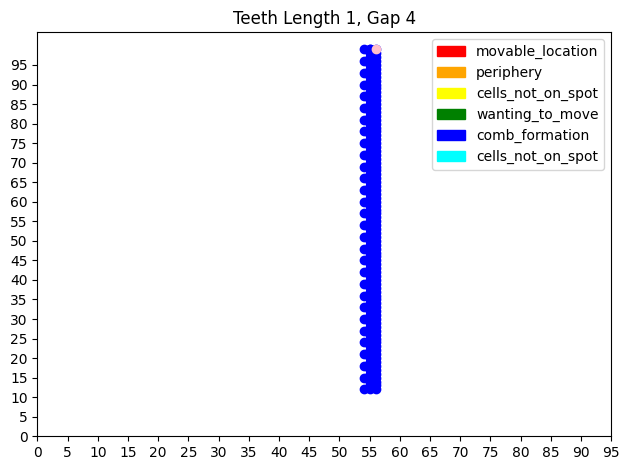

In [ ]:
cells_not_on_spot=[(57, 71), (57, 72), (57, 73), (57, 74), (57, 75), (57, 77), (57, 79), (57, 80), (57, 81), (57, 82), (57, 83), (57, 84), (57, 85), (57, 86), (57, 87), (57, 88), (57, 89), (57, 90), (57, 91), (57, 92), (57, 93), (57, 94), (57, 95), (57, 96), (57, 97), (57, 98), (57, 99), (58, 76)]
wanting_to_move={(55, 57), (55, 63), (55, 66), (55, 72), (56, 71), (56, 77), (55, 75), (55, 69), (56, 74), (56, 80), (55, 78), (55, 84), (56, 83), (56, 89), (55, 81), (55, 93), (55, 87), (56, 92), (55, 90), (56, 86), (55, 96), (56, 95), (56, 98), (56, 73), (56, 76), (56, 82), (56, 79), (56, 85), (56, 88), (56, 94), (56, 91), (56, 97), (55, 15), (56, 75), (56, 72), (55, 18), (56, 84), (55, 21), (56, 81), (56, 87), (55, 27), (55, 24), (55, 30), (56, 90), (56, 96), (55, 33), (56, 93), (55, 39), (55, 36), (55, 42), (55, 48), (55, 45), (55, 51), (55, 54), (55, 60)}
comb_formation= [[56, 99], [55, 99], [54, 99], [55, 99], [56, 98], [55, 98], [56, 97], [55, 97], [56, 96], [55, 96], [54, 96], [55, 96], [56, 95], [55, 95], [56, 94], [55, 94], [56, 93], [55, 93], [54, 93], [55, 93], [56, 92], [55, 92], [56, 91], [55, 91], [56, 90], [55, 90], [54, 90], [55, 90], [56, 89], [55, 89], [56, 88], [55, 88], [56, 87], [55, 87], [54, 87], [55, 87], [56, 86], [55, 86], [56, 85], [55, 85], [56, 84], [55, 84], [54, 84], [55, 84], [56, 83], [55, 83], [56, 82], [55, 82], [56, 81], [55, 81], [54, 81], [55, 81], [56, 80], [55, 80], [56, 79], [55, 79], [56, 78], [55, 78], [54, 78], [55, 78], [56, 77], [55, 77], [56, 76], [55, 76], [56, 75], [55, 75], [54, 75], [55, 75], [56, 74], [55, 74], [56, 73], [55, 73], [56, 72], [55, 72], [54, 72], [55, 72], [56, 71], [55, 71], [56, 70], [55, 70], [56, 69], [55, 69], [54, 69], [55, 69], [56, 68], [55, 68], [56, 67], [55, 67], [56, 66], [55, 66], [54, 66], [55, 66], [56, 65], [55, 65], [56, 64], [55, 64], [56, 63], [55, 63], [54, 63], [55, 63], [56, 62], [55, 62], [56, 61], [55, 61], [56, 60], [55, 60], [54, 60], [55, 60], [56, 59], [55, 59], [56, 58], [55, 58], [56, 57], [55, 57], [54, 57], [55, 57], [56, 56], [55, 56], [56, 55], [55, 55], [56, 54], [55, 54], [54, 54], [55, 54], [56, 53], [55, 53], [56, 52], [55, 52], [56, 51], [55, 51], [54, 51], [55, 51], [56, 50], [55, 50], [56, 49], [55, 49], [56, 48], [55, 48], [54, 48], [55, 48], [56, 47], [55, 47], [56, 46], [55, 46], [56, 45], [55, 45], [54, 45], [55, 45], [56, 44], [55, 44], [56, 43], [55, 43], [56, 42], [55, 42], [54, 42], [55, 42], [56, 41], [55, 41], [56, 40], [55, 40], [56, 39], [55, 39], [54, 39], [55, 39], [56, 38], [55, 38], [56, 37], [55, 37], [56, 36], [55, 36], [54, 36], [55, 36], [56, 35], [55, 35], [56, 34], [55, 34], [56, 33], [55, 33], [54, 33], [55, 33], [56, 32], [55, 32], [56, 31], [55, 31], [56, 30], [55, 30], [54, 30], [55, 30], [56, 29], [55, 29], [56, 28], [55, 28], [56, 27], [55, 27], [54, 27], [55, 27], [56, 26], [55, 26], [56, 25], [55, 25], [56, 24], [55, 24], [54, 24], [55, 24], [56, 23], [55, 23], [56, 22], [55, 22], [56, 21], [55, 21], [54, 21], [55, 21], [56, 20], [55, 20], [56, 19], [55, 19], [56, 18], [55, 18], [54, 18], [55, 18], [56, 17], [55, 17], [56, 16], [55, 16], [56, 15], [55, 15], [54, 15], [55, 15], [56, 14], [55, 14], [56, 13], [55, 13], [56, 12], [55, 12], [54, 12]]
movable_location= [(54, 11), (54, 13), (53, 12), (54, 14), (54, 16), (53, 15), (54, 17), (54, 19), (53, 18), (54, 20), (54, 22), (53, 21), (54, 23), (54, 25), (53, 24), (54, 26), (54, 28), (53, 27), (54, 29), (54, 31), (53, 30), (54, 32), (54, 34), (53, 33), (54, 35), (54, 37), (53, 36), (54, 38), (54, 40), (53, 39), (54, 41), (54, 43), (53, 42), (54, 44), (54, 46), (53, 45), (54, 47), (54, 49), (53, 48), (54, 50), (54, 52), (53, 51), (54, 53), (54, 55), (53, 54), (54, 56), (54, 58), (53, 57), (54, 59), (54, 61), (53, 60), (54, 62), (54, 64), (53, 63), (54, 65), (54, 67), (53, 66), (54, 68), (54, 70), (53, 69), (54, 71), (54, 73), (53, 72), (54, 74), (54, 76), (53, 75), (54, 77), (54, 79), (53, 78), (54, 80), (54, 82), (53, 81), (54, 83), (54, 85), (53, 84), (54, 86), (54, 88), (53, 87), (54, 89), (54, 91), (53, 90), (54, 92), (54, 94), (53, 93), (54, 95), (54, 97), (53, 96), (54, 98), (54, 0), (53, 99), (55, 11), (55, 0), (56, 11), (57, 12), (57, 13), (57, 14), (57, 15), (57, 16), (57, 17), (57, 18), (57, 19), (57, 20), (57, 21), (57, 22), (57, 23), (57, 24), (57, 25), (57, 26), (57, 27), (57, 28), (57, 29), (57, 30), (57, 31), (57, 32), (57, 33), (57, 34), (57, 35), (57, 36), (57, 37), (57, 38), (57, 39), (57, 40), (57, 41), (57, 42), (57, 43), (57, 44), (57, 45), (57, 46), (57, 47), (57, 48), (57, 49), (57, 50), (57, 51), (57, 52), (57, 53), (57, 54), (57, 55), (57, 56), (57, 57), (57, 58), (57, 59), (57, 60), (57, 61), (57, 62), (57, 63), (57, 64), (57, 65), (57, 66), (57, 67), (57, 68), (57, 69), (57, 70), (57, 78), (56, 0), (58, 71), (58, 72), (58, 73), (58, 74), (58, 75), (58, 77), (58, 79), (58, 80), (58, 81), (58, 82), (58, 83), (58, 84), (58, 85), (58, 86), (58, 87), (58, 88), (58, 89), (58, 90), (58, 91), (58, 92), (58, 93), (58, 94), (58, 95), (58, 96), (58, 97), (58, 98), (57, 0), (58, 99), (59, 76)]
periphery= [(57, 91), (55, 20), (56, 19), (56, 28), (56, 37), (57, 75), (55, 50), (57, 84), (55, 59), (55, 68), (55, 13), (54, 15), (56, 12), (55, 77), (56, 67), (55, 22), (54, 24), (56, 21), (55, 86), (54, 33), (56, 30), (54, 42), (56, 39), (55, 43), (57, 77), (55, 52), (55, 61), (56, 60), (55, 70), (54, 72), (56, 69), (56, 14), (55, 79), (54, 81), (56, 78), (57, 98), (56, 23), (54, 90), (56, 32), (54, 99), (56, 53), (56, 62), (56, 16), (56, 25), (55, 29), (55, 38), (57, 72), (55, 47), (56, 46), (55, 56), (56, 55), (55, 65), (56, 64), (54, 12), (57, 93), (54, 21), (56, 18), (54, 30), (58, 76), (55, 31), (55, 95), (55, 40), (55, 49), (54, 51), (56, 48), (55, 58), (54, 60), (56, 57), (55, 67), (54, 69), (56, 66), (57, 86), (54, 78), (57, 95), (56, 20), (54, 87), (55, 88), (55, 97), (56, 41), (56, 50), (57, 79), (56, 59), (57, 88), (56, 68), (56, 13), (57, 97), (55, 17), (55, 26), (55, 35), (56, 34), (55, 99), (55, 44), (56, 43), (55, 53), (56, 52), (57, 81), (56, 61), (57, 90), (56, 70), (54, 18), (57, 99), (55, 74), (55, 19), (55, 83), (55, 28), (56, 27), (55, 92), (55, 37), (54, 39), (56, 36), (55, 46), (54, 48), (56, 45), (54, 57), (56, 54), (57, 74), (54, 66), (56, 63), (57, 83), (54, 75), (57, 92), (55, 12), (55, 76), (55, 85), (56, 29), (55, 94), (54, 96), (56, 38), (56, 47), (56, 56), (57, 85), (56, 65), (57, 94), (55, 14), (55, 23), (56, 22), (55, 32), (56, 31), (55, 41), (56, 40), (56, 49), (56, 58), (57, 87), (55, 62), (57, 96), (55, 71), (55, 16), (56, 15), (55, 80), (55, 25), (54, 27), (56, 24), (55, 89), (55, 34), (54, 36), (56, 33), (55, 98), (54, 45), (56, 42), (54, 54), (56, 51), (57, 71), (54, 63), (57, 80), (55, 55), (57, 89), (55, 64), (55, 73), (56, 17), (55, 82), (54, 84), (56, 26), (55, 91), (54, 93), (56, 35), (56, 99), (56, 44), (57, 73), (57, 82)]
fig, ax = plt.subplots()
#x, y = np.meshgrid(list(range(10)), list(range(10)))

"""x, y = zip(*movable_location)
ax.scatter(x,y,color = "red")
x, y = zip(*periphery)
ax.scatter(x,y,color = "orange")
x, y = zip(*cells_not_on_spot)
ax.scatter(x,y,color = "yellow")
x, y = zip(*wanting_to_move)
ax.scatter(x,y,color = "green")"""
x, y = zip(*comb_formation)
ax.scatter(x,y,color = "blue")
"""x, y = zip(*cells_not_on_spot)
ax.scatter(x,y,color = "cyan")"""
ax.scatter(56, 99,color = "pink")


color_list = ["red","orange","yellow","green","blue","cyan"]
lables = ["movable_location","periphery","cells_not_on_spot","wanting_to_move","comb_formation","cells_not_on_spot"]
colorlist = zip(lables,color_list)
handles = [mpatches.Patch(color=colour, label=label) for label, colour in colorlist]
ax.set_xticks(np.arange(0, 100, 5))
ax.set_yticks(np.arange(0, 100, 5))
name = "Teeth Length 1, Gap 4"
ax.set_title(name)
a = plt.legend(handles, lables, ncol=1, bbox_to_anchor=(1, 1))
plt.tight_layout()
fig.savefig(f'graphs/{name}.png')


(53, 53, 53, 52, 53, 53, 52, 52, 53, 52, 53, 53, 53, 52, 53, 53, 53, 52, 52, 52, 53, 52, 52, 52, 53, 52, 53, 53, 53, 53, 53, 52, 52) (11, 17, 23, 6, 29, 35, 12, 18, 41, 24, 4, 7, 13, 48, 25, 31, 37, 8, 14, 20, 43, 26, 32, 38, 9, 50, 15, 21, 27, 33, 39, 10, 16)


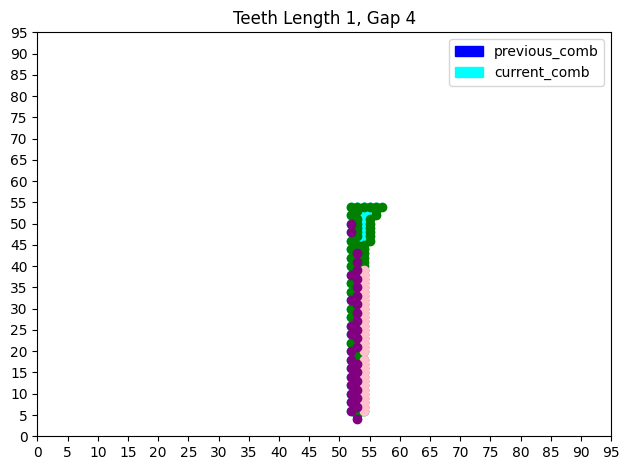

In [24]:
previous_comb=[(54, 7), (54, 10), (54, 16), (53, 14), (53, 20), (54, 13), (54, 19), (54, 25), (54, 22), (54, 28), (53, 26), (53, 32), (54, 31), (54, 37), (54, 34), (54, 40), (53, 38), (53, 44), (54, 43), (54, 49), (54, 46), (54, 52), (53, 50), (54, 9), (54, 6), (54, 12), (54, 18), (53, 16), (53, 10), (54, 15), (54, 21), (54, 24), (54, 30), (53, 28), (53, 34), (54, 27), (54, 33), (53, 22), (54, 36), (54, 42), (53, 40), (53, 46), (54, 39), (54, 45), (54, 48), (54, 54), (53, 52), (54, 51), (53, 6), (54, 5), (54, 11), (54, 8), (54, 14), (53, 12), (53, 18), (54, 17), (54, 23), (54, 20), (54, 26), (53, 24), (53, 30), (54, 29), (54, 35), (54, 32), (54, 38), (54, 44), (53, 42), (53, 36), (54, 41), (54, 47), (54, 50), (53, 48), (53, 54), (54, 53), (53, 8), (55, 54), (54, 52), (55, 47), (55, 53), (55, 50), (55, 46), (54, 48), (54, 54), (55, 43), (55, 49), (54, 44), (55, 52), (55, 48), (54, 50), (55, 45), (55, 51), (55, 54), (55, 44), (54, 46), (56, 54), (56, 54), (55, 54), (56, 52), (56, 53), (57, 54), (57, 54)]

current_comb= [(52, 40), (52, 46), (53, 11), (53, 5), (53, 14), (53, 20), (52, 52), (53, 17), (53, 23), (53, 26), (53, 32), (52, 6), (53, 29), (53, 35), (53, 38), (53, 44), (52, 18), (52, 12), (53, 41), (53, 47), (53, 53), (53, 50), (52, 30), (52, 24), (52, 36), (52, 42), (53, 7), (53, 13), (53, 10), (53, 16), (52, 48), (52, 54), (53, 19), (53, 25), (53, 22), (53, 28), (53, 34), (53, 31), (53, 37), (52, 8), (53, 40), (53, 46), (52, 20), (52, 14), (53, 43), (53, 49), (53, 52), (52, 32), (52, 26), (53, 6), (52, 38), (52, 44), (52, 28), (53, 9), (53, 12), (53, 18), (52, 50), (53, 15), (53, 21), (53, 27), (53, 24), (53, 30), (53, 33), (53, 39), (53, 36), (53, 42), (52, 16), (52, 10), (53, 45), (53, 51), (53, 48), (53, 54), (52, 22), (53, 8), (52, 34), (54, 54), (54, 52), (53, 50), (53, 46), (54, 45), (54, 48), (54, 54), (53, 52), (54, 44), (54, 51), (54, 47), (54, 50), (53, 48), (53, 54), (54, 53), (53, 44), (54, 43), (54, 49), (54, 46), (55, 54), (55, 52), (55, 53), (54, 54), (55, 54), (56, 54), (56, 54)]
invalid_move = [(54, 39), (52, 16)]
periphery =  [(52, 40), (53, 5), (54, 7), (54, 16), (53, 14), (54, 13), (54, 25), (54, 22), (53, 32), (54, 31), (54, 40), (53, 38), (53, 47), (56, 52), (55, 50), (52, 42), (54, 9), (54, 6), (54, 18), (53, 16), (54, 15), (54, 24), (53, 22), (53, 34), (54, 33), (54, 42), (53, 40), (54, 39), (53, 49), (55, 46), (56, 54), (52, 44), (54, 11), (54, 8), (53, 18), (54, 17), (54, 26), (53, 24), (54, 35), (54, 32), (54, 44), (53, 42), (54, 41), (53, 51), (55, 48), (53, 48), (52, 28), (55, 54), (56, 53), (52, 34), (52, 46), (54, 10), (53, 20), (52, 52), (54, 28), (53, 26), (54, 37), (57, 54), (54, 34), (53, 44), (54, 43), (53, 53), (53, 50), (52, 30), (55, 47), (52, 36), (54, 12), (53, 10), (54, 21), (52, 54), (53, 19), (54, 30), (53, 28), (54, 27), (54, 36), (54, 45), (54, 54), (55, 49), (53, 6), (54, 14), (53, 12), (54, 23), (54, 20), (53, 30), (54, 29), (54, 38), (53, 36), (53, 45), (52, 22), (53, 54), (55, 51), (53, 8)]
fig, ax = plt.subplots()
#x, y = np.meshgrid(list(range(10)), list(range(10)))


"""x, y = zip(*previous_comb)
ax.scatter(x,y,color = "blue")"""
x, y = zip(*current_comb)
ax.scatter(x,y,color = "cyan")


x, y = zip(*periphery)
ax.scatter(x,y,color = "green")

invalid_move_from= [(54, 6), (54, 7), (54, 8), (54, 9), (54, 10), (54, 11), (54, 12), (54, 13), (54, 14), (54, 15), (54, 16), (54, 17), (54, 18), (54, 20), (54, 21), (54, 22), (54, 23), (54, 24), (54, 25), (54, 26), (54, 27), (54, 28), (54, 29), (54, 30), (54, 31), (54, 32), (54, 33), (54, 34), (54, 35), (54, 36), (54, 37), (54, 38), (54, 39)]
x, y = zip(*invalid_move_from)
ax.scatter(x,y,color = "pink")
invalid_move_to= [(53, 11), (53, 17), (53, 23), (52, 6), (53, 29), (53, 35), (52, 12), (52, 18), (53, 41), (52, 24), (53, 4), (53, 7), (53, 13), (52, 48), (53, 25), (53, 31), (53, 37), (52, 8), (52, 14), (52, 20), (53, 43), (52, 26), (52, 32), (52, 38), (53, 9), (52, 50), (53, 15), (53, 21), (53, 27), (53, 33), (53, 39), (52, 10), (52, 16)]
x, y = zip(*invalid_move_to)
ax.scatter(x,y,color = "purple")
print(x,y)



color_list = ["blue","cyan"]
lables = ["previous_comb","current_comb"]
colorlist = zip(lables,color_list)
handles = [mpatches.Patch(color=colour, label=label) for label, colour in colorlist]
ax.set_xticks(np.arange(0, 100, 5))
ax.set_yticks(np.arange(0, 100, 5))
name = "Teeth Length 1, Gap 4"
ax.set_title(name)
a = plt.legend(handles, lables, ncol=1, bbox_to_anchor=(1, 1))
plt.tight_layout()



(51, 50, 50, 50, 50, 49, 50, 49, 50, 50, 55, 50, 56, 51, 50, 52, 51, 49, 50, 50, 49, 50, 49, 50, 50, 50, 53, 50, 55, 56, 50, 51, 51, 50, 49, 49, 50, 50, 49, 50, 50, 49, 50, 53, 50, 50, 50, 56, 50, 51, 51, 50, 51, 50, 49, 49, 49, 50, 57, 50, 49, 50, 50, 54, 50, 50, 50, 51, 51, 50, 52, 50, 49, 50, 50, 49, 50, 50, 49, 54, 50, 50, 51, 51, 51, 50, 50, 50, 49, 50, 50, 50, 50, 51, 51, 50) (47, 6, 58, 3, 12, 56, 21, 53, 30, 27, 53, 36, 52, 98, 45, 51, 49, 40, 5, 14, 46, 23, 55, 20, 32, 29, 54, 38, 52, 54, 47, 97, 42, 56, 97, 42, 7, 16, 48, 13, 25, 57, 22, 51, 31, 95, 40, 53, 49, 99, 44, 55, 50, 0, 99, 44, 96, 9, 54, 18, 50, 15, 24, 52, 33, 39, 51, 46, 43, 57, 54, 2, 98, 11, 8, 52, 17, 26, 58, 54, 35, 41, 48, 45, 54, 4, 1, 10, 54, 19, 28, 37, 34, 96, 41, 43)


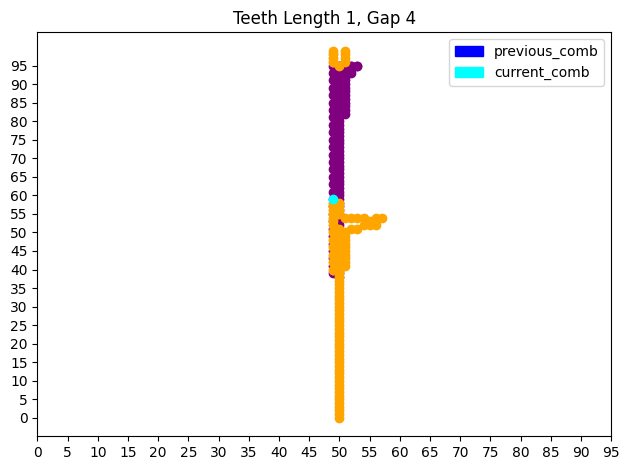

In [29]:
previous_comb=  [(49, 87), (50, 52), (50, 61), (50, 70), (49, 53), (50, 91), (49, 71), (50, 45), (49, 89), (50, 54), (50, 63), (49, 55), (50, 84), (50, 93), (49, 73), (50, 38), (50, 47), (50, 56), (49, 39), (49, 57), (50, 86), (50, 95), (49, 75), (50, 40), (50, 49), (49, 41), (50, 79), (49, 59), (50, 88), (50, 42), (50, 51), (49, 43), (50, 72), (50, 81), (49, 61), (50, 90), (50, 44), (49, 91), (50, 65), (49, 45), (50, 74), (50, 83), (49, 63), (50, 92), (49, 93), (50, 58), (50, 67), (49, 47), (50, 76), (50, 85), (50, 94), (49, 77), (49, 95), (50, 60), (50, 69), (49, 49), (50, 78), (50, 87), (49, 79), (50, 53), (50, 62), (50, 71), (50, 80), (50, 89), (49, 81), (50, 46), (50, 55), (50, 64), (50, 73), (50, 82), (49, 65), (50, 39), (49, 83), (50, 48), (50, 57), (50, 66), (50, 75), (49, 67), (50, 41), (49, 85), (50, 50), (50, 59), (50, 68), (50, 77), (49, 51), (49, 69), (50, 43), (51, 95), (50, 85), (51, 86), (51, 83), (51, 89), (50, 91), (51, 92), (51, 95), (50, 87), (51, 82), (51, 85), (51, 91), (50, 93), (51, 88), (51, 94), (50, 83), (50, 89), (51, 84), (51, 87), (51, 93), (50, 95), (51, 90), (52, 95), (52, 94), (51, 95), (52, 93), (51, 93), (52, 95), (53, 95), (53, 95)]
invalid_move_from= [(49, 40), (49, 42), (49, 44), (49, 46), (49, 48), (49, 50), (49, 52), (49, 54), (49, 56), (49, 58), (49, 96), (49, 97), (49, 98)]
periphery= [(51, 47), (50, 6), (50, 58), (50, 3), (50, 12), (49, 56), (50, 21), (49, 53), (50, 30), (50, 27), (55, 53), (50, 36), (56, 52), (51, 98), (50, 45), (52, 51), (51, 49), (49, 40), (50, 5), (50, 14), (49, 46), (50, 23), (49, 55), (50, 20), (50, 32), (50, 29), (53, 54), (50, 38), (55, 52), (56, 54), (50, 47), (51, 97), (51, 42), (50, 56), (49, 97), (49, 42), (50, 7), (50, 16), (49, 48), (50, 13), (50, 25), (49, 57), (50, 22), (53, 51), (50, 31), (50, 95), (50, 40), (56, 53), (50, 49), (51, 99), (51, 44), (50, 55), (51, 50), (50, 0), (49, 99), (49, 44), (49, 96), (50, 9), (57, 54), (50, 18), (49, 50), (50, 15), (50, 24), (54, 52), (50, 33), (50, 39), (50, 51), (51, 46), (51, 43), (50, 57), (52, 54), (50, 2), (49, 98), (50, 11), (50, 8), (49, 52), (50, 17), (50, 26), (49, 58), (54, 54), (50, 35), (50, 41), (51, 48), (51, 45), (51, 54), (50, 4), (50, 1), (50, 10), (49, 54), (50, 19), (50, 28), (50, 37), (50, 34), (51, 96), (51, 41), (50, 43)]
fig, ax = plt.subplots()
#x, y = np.meshgrid(list(range(10)), list(range(10)))


"""x, y = zip(*previous_comb)
ax.scatter(x,y,color = "blue")"""





x, y = zip(*previous_comb)
ax.scatter(x,y,color = "purple")
x, y = zip(*invalid_move_from)
ax.scatter(x,y,color = "pink")
x, y = zip(*periphery)
ax.scatter(x,y,color = "orange")
ax.scatter(49,59,color = "cyan")
print(x,y)



color_list = ["blue","cyan"]
lables = ["previous_comb","current_comb"]
colorlist = zip(lables,color_list)
handles = [mpatches.Patch(color=colour, label=label) for label, colour in colorlist]
ax.set_xticks(np.arange(0, 100, 5))
ax.set_yticks(np.arange(0, 100, 5))
name = "Teeth Length 1, Gap 4"
ax.set_title(name)
a = plt.legend(handles, lables, ncol=1, bbox_to_anchor=(1, 1))
plt.tight_layout()



In [ ]:
def graph_attribute(data,colorm)